# Benford's Law

In this notebook, we compare three applications of Benford's Law: 
1. Football transfers
2. Computer-generated images
3. Insurance claims

## Football transfers

We start by reading in the data. See https://github.com/ewenme/transfers for the data repository.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
from IPython.display import IFrame

In [4]:
url = 'https://raw.githubusercontent.com/ewenme/transfers/master/data/'

data = pd.DataFrame()

years = range(1992, 2022)
leagues = ['dutch_eredivisie.csv',
           'english_championship.csv',
           'english_premier_league.csv',
           'french_ligue_1.csv',
           'german_bundesliga_1.csv',
           'italian_serie_a.csv',
           'portugese_liga_nos.csv',
           'russian_premier_liga.csv',
           'spanish_primera_division.csv']

for year in years:
    print(year)
    for league in leagues:
        data_temp = pd.read_csv(url + str(year) + '/' + league)
        data = pd.concat([data, data_temp])

1992


HTTPError: HTTP Error 404: Not Found

In [ ]:
print(data.shape)
data.head()

(173321, 12)


,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Fortuna Sittard,René Hofman,31.0,Right Winger,Roda JC,?,in,Summer,NaN,Eredivisie,1992,1992/1993
1,Fortuna Sittard,Peter Schmitz,21.0,Forward,Helmond Sport,?,in,Summer,NaN,Eredivisie,1992,1992/1993
2,Fortuna Sittard,Kenneth Nysaether,22.0,Centre-Forward,Lillestrøm SK,?,in,Summer,NaN,Eredivisie,1992,1992/1993
3,Fortuna Sittard,Arno van Zwam,22.0,Goalkeeper,Fortuna U19,-,in,Summer,0.0,Eredivisie,1992,1992/1993
4,Fortuna Sittard,Jerry Taihuttu,22.0,Centre-Forward,Helmond Sport,Loan,out,Summer,0.0,Eredivisie,1992,1992/1993


### Let's examine the transfer fees

<!-- Everything is converted to GBP in "fee_cleaned". -->

In [ ]:
# Drop all transfer fees that are unavailable or 0

transfer_fees = data.fee_cleaned.dropna()
transfer_fees = transfer_fees[transfer_fees != 0]

In [ ]:
transfer_fees

41      0.817
42      0.013
46      1.170
53      0.005
88      0.817
        ...  
470     1.170
471     0.900
482     1.980
494    49.500
507     0.765
Name: fee_cleaned, Length: 31934, dtype: float64

In [ ]:
# Convert each number to a list of integers, leaving out the decimal point '.':

transfer_fees = transfer_fees.apply(lambda x: [int(y) for y in str(x) if (y != '.')])

In [ ]:
transfer_fees

41     [0, 8, 1, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
42     [0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
46                                             [1, 1, 7]
53                                          [0, 0, 0, 5]
88     [0, 8, 1, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                             ...                        
470                                            [1, 1, 7]
471                                               [0, 9]
482                                            [1, 9, 8]
494                                            [4, 9, 5]
507                                         [0, 7, 6, 5]
Name: fee_cleaned, Length: 31934, dtype: object

In [ ]:
# Get the first non-zero digit of each fee:

first = transfer_fees.apply(lambda x: x[np.argmax(np.array(x) != 0)])

In [ ]:
# Check frequencies of each first digit

for i in range(1, 10):
    print(i)
    print((first == i).mean())

1
0.2783866725120561
2
0.18469343019978707
3
0.11702260913133337
4
0.12535228909626103
5
0.06262917266862905
6
0.06679401265109287
7
0.04302624162334816
8
0.029185194463581136
9
0.09291037765391119


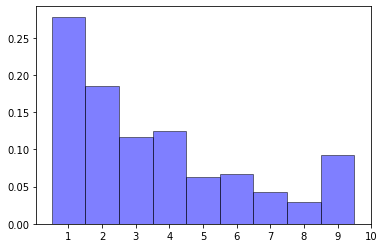

In [ ]:
# Plot and get empirical densities of first digits

bins = range(1, 11)

empirical_densities, _, _ = plt.hist(first, bins=bins, density=True, color='blue', alpha=0.5, edgecolor='black', align='left')
plt.xticks(bins)
plt.show()

### Let's check whether this corresponds to Benford's law!

In [ ]:
digits = np.cumsum(np.ones(9))
benfords_probabilities = np.log10(1 + 1/digits)

print(benfords_probabilities)

[0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]


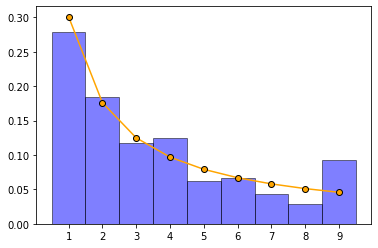

In [ ]:
fig, ax = plt.subplots()
fig = plt.plot(digits, benfords_probabilities, color='orange', zorder=1, marker='o', markeredgecolor='black')
fig = plt.hist(first, bins=bins, density=True, zorder=0, color='blue', alpha=0.5, edgecolor='black', align='left')
plt.xticks(bins[:-1])
plt.show()

### Although there are some weird deviations from Benford's law, we have to check whether they are significant!

In [ ]:
from scipy.stats import entropy, chisquare

In [ ]:
entropy(benfords_probabilities, empirical_densities)

0.03070724295654048

In [ ]:
chisquare(benfords_probabilities, empirical_densities)

Power_divergenceResult(statistic=0.05927680829311646, pvalue=0.9999999686010099)

### Both values are pretty low, indicating that the empirical distribution follows Benford's law reasonably well

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


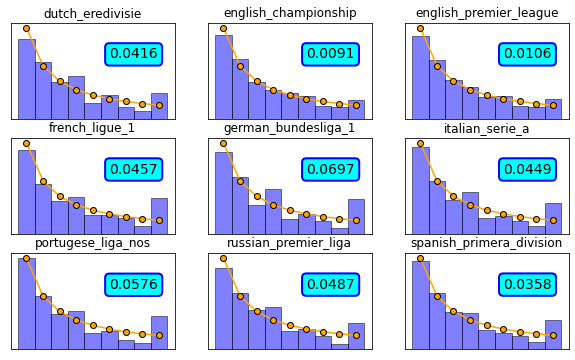

In [ ]:
# Check per league:

fig, axes = plt.subplots(3, 3, figsize=(10, 6))

axes = axes.ravel()

for index, selected_league in enumerate(['dutch_eredivisie.csv',
                                         'english_championship.csv',
                                         'english_premier_league.csv',
                                         'french_ligue_1.csv',
                                         'german_bundesliga_1.csv',
                                         'italian_serie_a.csv',
                                         'portugese_liga_nos.csv',
                                         'russian_premier_liga.csv',
                                         'spanish_primera_division.csv']):
    
    data = pd.DataFrame()

    for year in years:
        for league in leagues:
            if league == selected_league:
                data_temp = pd.read_csv(url + str(year) + '/' + league)
                data = pd.concat([data, data_temp])
                
    transfer_fees = data.fee_cleaned.dropna()
    transfer_fees = transfer_fees[transfer_fees != 0]
    
    transfer_fees = transfer_fees.apply(lambda x: [int(y) for y in str(x) if (y != '.')])
    
    first = transfer_fees.apply(lambda x: x[np.argmax(np.array(x) != 0)])
    
#     fig, ax = plt.subplots()
    ax = axes[index]
    bins = range(1, 11)
    ax.plot(digits, benfords_probabilities, color='orange', zorder=1, marker='o', markeredgecolor='black')
    empirical_densities, _, _ = ax.hist(first, bins=bins, density=True, zorder=0, color='blue', alpha=0.5, edgecolor='black', align='left')
    
#     ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
#     ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_title(selected_league[:-4])
    
#     ax.annotate(chisquare(benfords_probabilities, empirical_densities)[-1], xy=(6, 0.2))
    bbox_props = dict(boxstyle="round ,pad=0.3", fc="cyan", ec="b", lw=2)
    ax.annotate(np.round(entropy(benfords_probabilities, empirical_densities), 4), xy=(6, 0.2), fontsize=14, bbox=bbox_props)

plt.tight_layout()
plt.show()

### The portugese Liga Nos seems to be the most suspicious.

## Computer-generated images

Now let's try a different example: AI-generated images. Machine learning models are increasingly being used to generate new images. Using Benford's law, we can try to figure out whether an image is real or not.

We replicate the method presented in Bonettini, N., Bestagini, P., Milani, S., & Tubaro, S. (2021, January). On the use of Benford's law to detect GAN-generated images. In 2020 25th International Conference on Pattern Recognition (ICPR) (pp. 5495-5502). IEEE., see https://arxiv.org/pdf/2004.07682.pdf. 

In [ ]:
from PIL import Image
import requests

In [ ]:
# Take transformation
from scipy.fftpack import dct

In [ ]:
url = 'http://thiscatdoesnotexist.com/'

im = Image.open(requests.get(url, stream=True).raw)

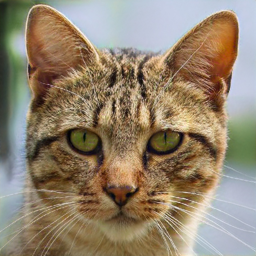

In [ ]:
# Show image:

display(im.resize((256, 256)))

In [ ]:
# We can see the pixels as an array of values:

print(np.array(im))
print(np.array(im).shape)
print(dct(im))

[[[ 79  79  53]
  [ 83  83  57]
  [ 76  79  52]
  ...
  [195 205 217]
  [192 200 211]
  [186 195 204]]

 [[ 74  74  48]
  [ 75  78  51]
  [ 71  74  47]
  ...
  [196 208 222]
  [193 203 213]
  [193 201 212]]

 [[ 68  68  42]
  [ 63  66  39]
  [ 62  66  39]
  ...
  [195 207 223]
  [195 207 221]
  [198 208 220]]

 ...

 [[109 109  83]
  [111 110  80]
  [118 115  84]
  ...
  [168 187 183]
  [174 186 182]
  [184 190 186]]

 [[109 105  80]
  [112 108  79]
  [118 112  80]
  ...
  [172 183 175]
  [178 185 177]
  [181 184 173]]

 [[111 105  83]
  [119 112  86]
  [119 110  79]
  ...
  [175 181 171]
  [174 176 163]
  [168 169 153]]]
(512, 512, 3)
[[[ 422.           45.033321    -26.        ]
  [ 446.           45.033321    -26.        ]
  [ 414.           41.56921938  -30.        ]
  ...
  [1234.          -38.10511777    2.        ]
  [1206.          -32.90896534    3.        ]
  [1170.          -31.17691454    0.        ]]

 [[ 392.           45.033321    -26.        ]
  [ 408.           41.5692

In [ ]:
# Get the first non-zero digit of each pixel:
im = np.array(dct(im)).flatten()

im = pd.Series(im)

# Take absolute value (no -)
im = np.round(np.abs(im), 2)

# Convert to lists of integers
im = im.apply(lambda x: [int(y) for y in str(x) if (y != '.')])

first = pd.Series(im).apply(lambda x: x[np.argmax(np.array(x) != 0)])

In [ ]:
# Filter out zero values

first = first[first != 0]

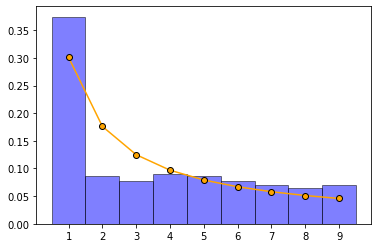

In [ ]:
digits = np.cumsum(np.ones(9))
benfords_probabilities = np.log10(1 + 1/digits)

fig, ax = plt.subplots()
bins = range(1, 11)
ax.plot(digits, benfords_probabilities, color='orange', zorder=1, marker='o', markeredgecolor='black')
ax.hist(first, bins=bins, density=True, zorder=0, color='blue', alpha=0.5, edgecolor='black', align='left')
plt.xticks(bins[:-1])
plt.show()

In [ ]:
# Get a nice looking loading bar

from tqdm import tqdm

In [ ]:
# Now for more images:
first_digits = []

print('Loading 10 images...')
for i in tqdm(range(10)):
    im = Image.open(requests.get(url, stream=True).raw)
    
    im = np.array(dct(im)).flatten()
    
    im = pd.Series(im)
    
    # Take absolute value (no -)
    im = np.round(np.abs(im), 2)

    # Convert to lists of integers
    im = im.apply(lambda x: [int(y) for y in str(x) if (y != '.')])

    # Take first non-zero integer:
    first = pd.Series(im).apply(lambda x: x[np.argmax(np.array(x) != 0)])
    
    first_digits.append(first)

Loading 10 images...


100%|██████████| 10/10 [01:14<00:00,  7.42s/it]


In [ ]:
first_digits = np.array(first_digits).flatten()

In [ ]:
first_digits

array([7, 1, 3, ..., 6, 4, 1])

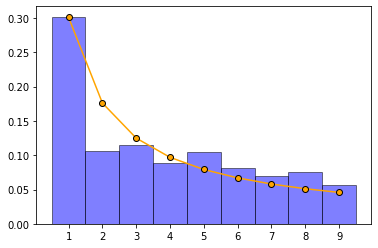

In [ ]:
fig, ax = plt.subplots()
bins = range(1, 11)
ax.plot(digits, benfords_probabilities, color='orange', zorder=1, marker='o', markeredgecolor='black')
fake_densities, _, _ = ax.hist(first_digits, bins=bins, density=True, zorder=0, color='blue', alpha=0.5, edgecolor='black', align='left')
plt.xticks(bins[:-1])
plt.show()

### Now, we compare with real cats

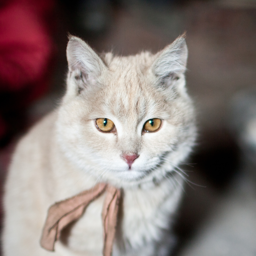

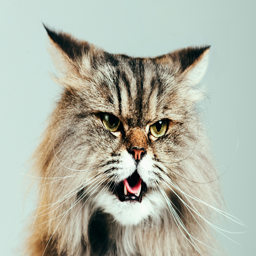

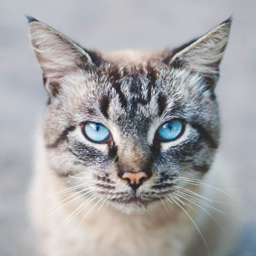

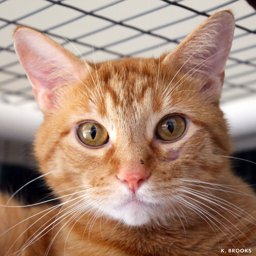

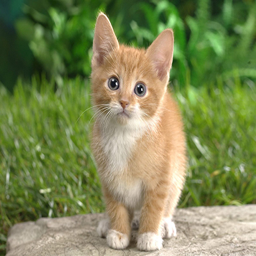

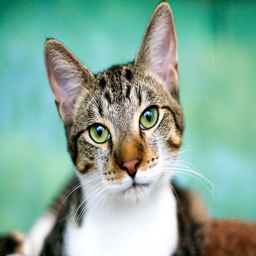

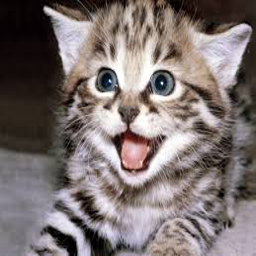

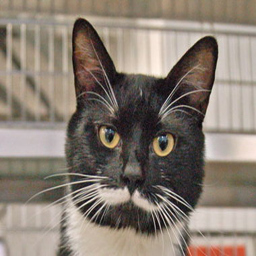

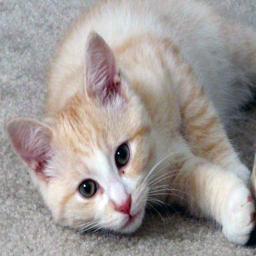

In [ ]:
# Compare with 10 real cats:

cat_urls = ['https://i.natgeofe.com/n/46b07b5e-1264-42e1-ae4b-8a021226e2d0/domestic-cat_thumb_square.jpg',
            'https://media.wired.co.uk/photos/60c8730fa81eb7f50b44037e/3:2/w_3329,h_2219,c_limit/1521-WIRED-Cat.jpeg',
            'https://d2zp5xs5cp8zlg.cloudfront.net/image-30938-800.jpg',
            'https://d3n8a8pro7vhmx.cloudfront.net/humanesocietyvc/pages/528/attachments/original/1473790159/jaz.orange.cat.jpg?1473790159'
            'https://cdn.pixabay.com/photo/2014/11/30/14/11/cat-551554__340.jpg',
            'https://user-images.githubusercontent.com/28751791/27799693-25002f86-600e-11e7-9c59-69ba1fb20102.jpg',
            'https://cdn2.thecatapi.com/images/58r4fYPa6.jpg',
            'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTDLzD_T-pKxR2ecs9CrJ_nXoh28d5od4D8oQ&usqp=CAU',
            'http://media.oregonlive.com/pets_impact/photo/10098525-large.jpg',
            'https://cdn.wallpapersafari.com/1/78/WFahye.jpg'
            ]

images = []

for cat_url in cat_urls:
  im_real = Image.open(requests.get(cat_url, stream=True).raw).resize((256, 256))
  display(im_real)
  images.append(np.array(dct(im_real).flatten())) 

In [ ]:
# Get first digits

images = np.array(images).flatten()

images = pd.Series(images)

# Take absolute value (no -)
images = np.round(np.abs(images), 2)

# Convert to lists of elements
images = images.apply(lambda x: [int(y) for y in str(x) if (y != '.')])

# Take first non-zero integer:
first = pd.Series(images).apply(lambda x: x[np.argmax(np.array(x) != 0)])

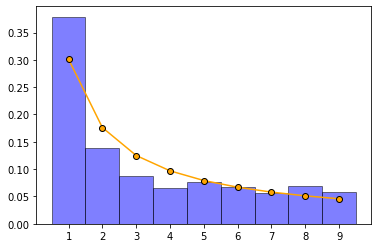

In [ ]:
fig, ax = plt.subplots()
bins = range(1, 11)
ax.plot(digits, benfords_probabilities, color='orange', zorder=1, marker='o', markeredgecolor='black')
real_densities, _, _ = ax.hist(first, bins=bins, density=True, zorder=0, color='blue', alpha=0.5, edgecolor='black', align='left')
plt.xticks(bins[:-1])
plt.show()

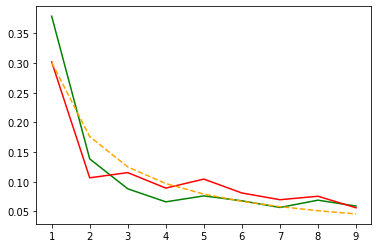

In [ ]:
# Compare both:

fig, ax = plt.subplots()
bins = range(1, 11)
ax.plot(digits, benfords_probabilities, color='orange', zorder=1, markeredgecolor='black', linestyle='--')
ax.plot(digits, real_densities, color='green', zorder=0)
ax.plot(digits, fake_densities, color='red', zorder=0)
plt.xticks(bins[:-1])
plt.show()

In [ ]:
print('Real cats entropy: ' + str(entropy(benfords_probabilities, real_densities)))
print('Fake cats entropy: ' + str(entropy(benfords_probabilities, fake_densities)))

Real cats entropy: 0.030608694503157976
Fake cats entropy: 0.030721073906409425


### Pretty equal!

Let's try with first two digits

In [ ]:
# Fake images:

# Now for more images:
first_digits = []

print('Loading 10 images...')
for i in tqdm(range(10)):
    im = Image.open(requests.get(url, stream=True).raw)
    
    im = np.array(dct(im)).flatten()
    
    im = pd.Series(im)
    
    # Take absolute value (no -)
    im = np.round(np.abs(im), 2)

    # Convert to lists of integers
    im = im.apply(lambda x: [int(y) for y in str(x) if (y != '.')])

    # Take first two non-zero integers:
    first = pd.Series(im).apply(lambda x: x[np.argmax(np.array(x) != 0):np.argmax(np.array(x) != 0)+2])

    first = first.apply(lambda x: int(str(x[0]) + str(x[1])))
    
    first_digits.append(first)

Loading 10 images...


100%|██████████| 10/10 [02:30<00:00, 15.03s/it]


In [ ]:
# Benfords probabilities

digits = range(10, 100)
benfords_probabilities = []
for digit in digits:
  benfords_probabilities.append(np.log10(1 + 1/(10*int(str(digit)[0]) + int(str(digit)[1]))))

print(benfords_probabilities)



[0.04139268515822507, 0.037788560889399754, 0.03476210625921191, 0.032184683371401235, 0.029963223377443202, 0.028028723600243534, 0.026328938722349145, 0.024823583725032145, 0.023481095849522904, 0.02227639471115221, 0.021189299069938092, 0.02020338608828699, 0.019305155195386624, 0.018483405694013133, 0.017728766960431616, 0.01703333929878037, 0.016390416188169384, 0.015794267183231882, 0.015239966556736905, 0.014723256820706378, 0.014240439114610285, 0.013788284485633283, 0.013363961557981502, 0.012964977164367635, 0.012589127308020467, 0.012234456417011586, 0.01189922329970769, 0.011581872549815138, 0.011281010409689084, 0.010995384301463145, 0.010723865391773066, 0.010465433678164977, 0.010219165181686028, 0.009984220906600923, 0.00975983728915624, 0.009545317906230361, 0.009340026254143432, 0.009143379439869719, 0.008954842652926412, 0.008773924307505152, 0.008600171761917567, 0.008433167536862764, 0.008272525965989857, 0.00811789022217946, 0.007968929671275373, 0.007825337511956

In [ ]:
first_digits = np.array(first_digits).flatten()

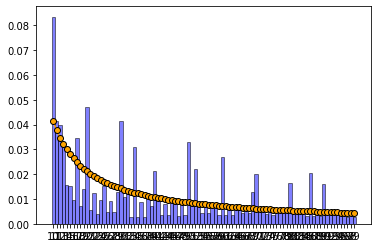

In [ ]:
fig, ax = plt.subplots()
bins = range(10, 101)
ax.plot(digits, benfords_probabilities, color='orange', zorder=1, marker='o', markeredgecolor='black')
fake_densities, _, _ = ax.hist(first_digits, bins=bins, density=True, zorder=0, color='blue', alpha=0.5, edgecolor='black', align='left')
plt.xticks(bins[:-1])
plt.show()

In [ ]:
# Real images

# Take first non-zero integer:
first = pd.Series(images).apply(lambda x: x[np.argmax(np.array(x) != 0):np.argmax(np.array(x) != 0)+2])

first = first.apply(lambda x: int(str(x[0]) + str(x[1])))

first.append(first)

0          11
1          71
2          55
3          12
4          72
           ..
1769467    10
1769468    12
1769469    91
1769470    10
1769471    12
Length: 3538944, dtype: int64

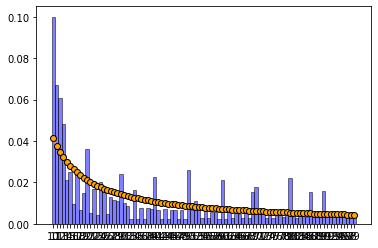

In [ ]:
fig, ax = plt.subplots()
bins = range(10, 101)
ax.plot(digits, benfords_probabilities, color='orange', zorder=1, marker='o', markeredgecolor='black')
real_densities, _, _ = ax.hist(first, bins=bins, density=True, zorder=0, color='blue', alpha=0.5, edgecolor='black', align='left')
plt.xticks(bins[:-1])
plt.show()

In [ ]:
len(real_densities)

90

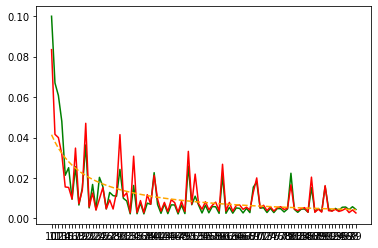

In [ ]:
# Compare both:

fig, ax = plt.subplots()
bins = range(10, 101)
ax.plot(digits, benfords_probabilities, color='orange', zorder=1, markeredgecolor='black', linestyle='--')
ax.plot(digits, real_densities, color='green', zorder=0)
ax.plot(digits, fake_densities, color='red', zorder=0)
plt.xticks(bins[:-1])
plt.show()

In [ ]:
print('Real cats entropy: ' + str(entropy(benfords_probabilities, real_densities)))
print('Fake cats entropy: ' + str(entropy(benfords_probabilities, fake_densities)))

Real cats entropy: 0.24330223125771366
Fake cats entropy: 0.23688943485682756


## Insurance claims

Let's try one more application: fraud detection in insurance claims.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/saritmaitra/Fraud-detection--Insurance/master/data/insurance_claims.csv')

data.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN


In [ ]:
claims = data.total_claim_amount

print(claims)

0       71610
1        5070
2       34650
3       63400
4        6500
        ...  
995     87200
996    108480
997     67500
998     46980
999      5060
Name: total_claim_amount, Length: 1000, dtype: int64


0      7
1      5
2      3
3      6
4      6
      ..
995    8
996    1
997    6
998    4
999    5
Name: total_claim_amount, Length: 1000, dtype: int64


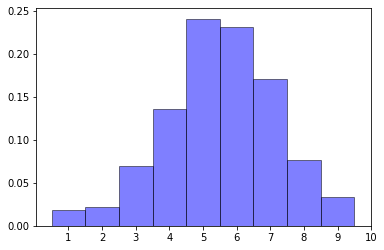

In [ ]:
# Get first digits: 

claims = claims.apply(lambda x: [int(y) for y in str(x) if (y != '.')])

first = claims.apply(lambda x: x[np.argmax(np.array(x) != 0)])

print(first)

bins = range(1, 11)

empirical_densities, _, _ = plt.hist(first, bins=bins, density=True, color='blue', alpha=0.5, edgecolor='black', align='left')
plt.xticks(bins)
plt.show()

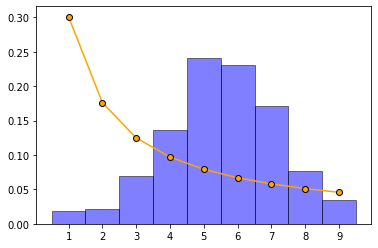

In [ ]:
digits = np.cumsum(np.ones(9))
benfords_probabilities = np.log10(1 + 1/digits)

fig, ax = plt.subplots()
fig = plt.plot(digits, benfords_probabilities, color='orange', zorder=1, marker='o', markeredgecolor='black')
fig = plt.hist(first, bins=bins, density=True, zorder=0, color='blue', alpha=0.5, edgecolor='black', align='left')
plt.xticks(bins[:-1])
plt.show()

In [ ]:
# Check difference between fraud/non-fraud:

fraud_claims = data[data.fraud_reported == 'Y'].total_claim_amount

legit_claims = data[data.fraud_reported == 'N'].total_claim_amount


In [ ]:
fraud_claims = fraud_claims.apply(lambda x: [int(y) for y in str(x) if (y != '.')])

fraud_first = fraud_claims.apply(lambda x: x[np.argmax(np.array(x) != 0)])

legit_claims = legit_claims.apply(lambda x: [int(y) for y in str(x) if (y != '.')])

legit_first = legit_claims.apply(lambda x: x[np.argmax(np.array(x) != 0)])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


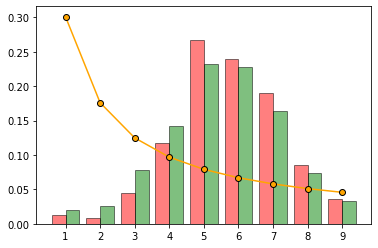

In [ ]:

plt.plot(digits, benfords_probabilities, color='orange', zorder=1, marker='o', markeredgecolor='black')
densities, _, _ = plt.hist([fraud_first, legit_first], bins=bins, density=True, zorder=0, color=['red', 'green'], alpha=0.5, edgecolor='black', align='left')
plt.xticks(bins[:-1])
plt.show()

In [ ]:
real_densities = densities[1]
fraud_densities = densities[0]

In [ ]:
print('Legit entropy: ' + str(entropy(benfords_probabilities, real_densities)))
print('Fraud entropy: ' + str(entropy(benfords_probabilities, fraud_densities)))

Legit entropy: 0.9393246843124982
Fraud entropy: 1.3529959197984294


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

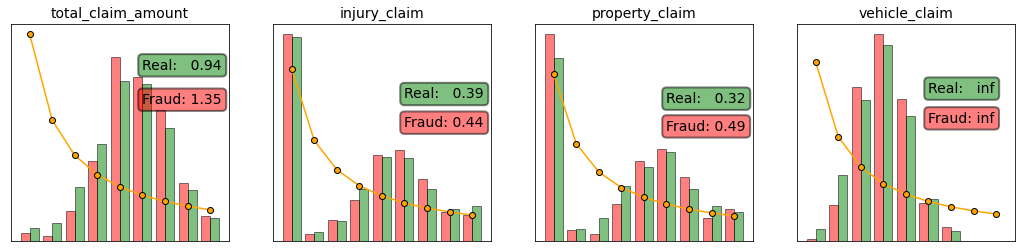

In [ ]:
# Check for all types of claims separately:

fig, axes = plt.subplots(1, 4, figsize=(18, 4))

axes = axes.ravel()

for index, claim in enumerate(['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']):
  fraud_claims = data[data.fraud_reported == 'Y'][claim]
  legit_claims = data[data.fraud_reported == 'N'][claim]

  fraud_claims = fraud_claims.apply(lambda x: [int(y) for y in str(x) if (y != '.')])
  fraud_first = fraud_claims.apply(lambda x: x[np.argmax(np.array(x) != 0)])
  legit_claims = legit_claims.apply(lambda x: [int(y) for y in str(x) if (y != '.')])
  legit_first = legit_claims.apply(lambda x: x[np.argmax(np.array(x) != 0)])

  ax = axes[index]

  ax.plot(digits, benfords_probabilities, color='orange', zorder=1, marker='o', markeredgecolor='black')
  densities, _, _ = ax.hist([fraud_first, legit_first], bins=bins, density=True, zorder=0, color=['red', 'green'], alpha=0.5, edgecolor='black', align='left')
  plt.xticks(bins[:-1])

  real_densities = densities[1]
  fraud_densities = densities[0]

  # print('Legit entropy: ' + str(entropy(benfords_probabilities, real_densities)))
  # print('Fraud entropy: ' + str(entropy(benfords_probabilities, fraud_densities)))

  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  ax.set_title(claim, fontsize=14)
  
  # ax.annotate(chisquare(benfords_probabilities, empirical_densities)[-1], xy=(6, 0.2))
  bbox_props = dict(boxstyle="round ,pad=0.3", fc="green", ec="green", lw=2, alpha=0.5)
  ax.annotate('Real:   ' + str(np.round(entropy(benfords_probabilities, real_densities), 2)), xy=(6, 0.25), fontsize=14, bbox=bbox_props)
  bbox_props = dict(boxstyle="round ,pad=0.3", fc="red", ec="red", lw=2, alpha=0.5)
  ax.annotate('Fraud: ' + str(np.round(entropy(benfords_probabilities, fraud_densities), 2)), xy=(6, 0.2), fontsize=14, bbox=bbox_props)

plt.show()

Fraudulent claims deviate more often from what we expect using Benford's law. This way, the first digit of the claim could be used to help detect fraud!